In [46]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

#ignore normal warnings
import warnings; warnings.simplefilter('ignore')


In [2]:
# Storing our Data World Wine filepath in a variable
data_world_wines = "../Group Porject 1 Data Somms/DataWorldWines.csv"

## Explore price with reference to different variable - find the max, min, mean - James
<br> By grape
<br> By vintage
<br>By region
<br> By vintage + region


In [3]:
# Preview the Data World Wine dataframe
data_world_wines_df = pd.read_csv(data_world_wines, encoding="ISO-8859-1")
data_world_wines_df.head()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery
0,1/1/1919,Spain,Cava,1919 Brut Selecci¢,88,$13.00,Catalonia,L'Arboc NV 1919 Brut Selecci¢ Sparkling (Cava),Sparkling Blend,L'Arboc
1,1/1/1929,Italy,Vernaccia di San Gimignano,NaN,87,$14.00,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929
2,1/1/1929,Italy,Sangiovese di Romagna Superiore,Prugneto,84,$15.00,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929
3,1/1/1934,Portugal,NaN,Reserva Velho,93,$495.00,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes
4,1/1/1945,France,Rivesaltes,Legend Vintage,95,$350.00,Languedoc-Roussillon,Grard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Grard Bertrand


In [4]:
#create new column with price as float
data_world_wines_df['Price_Float'] = data_world_wines_df['Price'].replace('[\$,]', '', regex=True).astype(float)
data_world_wines_df.head()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Price_Float
0,1/1/1919,Spain,Cava,1919 Brut Selecci¢,88,$13.00,Catalonia,L'Arboc NV 1919 Brut Selecci¢ Sparkling (Cava),Sparkling Blend,L'Arboc,13.0
1,1/1/1929,Italy,Vernaccia di San Gimignano,NaN,87,$14.00,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929,14.0
2,1/1/1929,Italy,Sangiovese di Romagna Superiore,Prugneto,84,$15.00,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929,15.0
3,1/1/1934,Portugal,NaN,Reserva Velho,93,$495.00,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes,495.0
4,1/1/1945,France,Rivesaltes,Legend Vintage,95,$350.00,Languedoc-Roussillon,Grard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Grard Bertrand,350.0


In [5]:
data_world_wines_df['Country'].describe()

count     24989
unique       37
top          US
freq      10576
Name: Country, dtype: object

In [62]:
data_world_wines_df['Price_Float'].describe()

count    23375.00000
mean        35.46708
std         40.83522
min          4.00000
25%         17.00000
50%         25.00000
75%         42.00000
max       2500.00000
Name: Price_Float, dtype: float64

In [27]:
#find top 5 the most expensive wine
data_world_wines_df.sort_values(by='Price_Float',ascending=False).head(10)
                                                                      

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Price_Float,Price_Per_Points
20970,1/1/2014,France,Pomerol,NaN,96,"$2,500.00",Bordeaux,Chteau Ptrus 2014 Pomerol,Bordeaux-style Red Blend,Chteau Ptrus,2500.0,26.041667
10344,1/1/2010,France,Saint-milion,NaN,100,"$1,500.00",Bordeaux,Chteau Cheval Blanc 2010 Saint-milion,Bordeaux-style Red Blend,Chteau Cheval Blanc,1500.0,15.000000
7158,1/1/2009,Australia,Eden Valley,Hill of Grace,91,$780.00,South Australia,Henschke 2009 Hill of Grace Shiraz (Eden Valley),Shiraz,Henschke,780.0,8.571429
22902,1/1/2015,Germany,NaN,Kiedrich Grfenberg Trockenbeerenauslese,98,$775.00,Rheingau,Robert Weil 2015 Kiedrich Grfenberg Trockenbe...,Riesling,Robert Weil,775.0,7.908163
15968,1/1/2012,Spain,Priorat,El Perer,96,$770.00,Catalonia,Marco Abella 2012 El Perer Carignan (Priorat),Carignan,Marco Abella,770.0,8.020833
737,1/1/2003,Hungary,NaN,Essencia,94,$764.00,Tokaji,Royal Tokaji 2003 Essencia (Tokaji),Furmint,Royal Tokaji,764.0,8.127660
21755,1/1/2014,France,Chevalier-Montrachet,NaN,95,$710.00,Burgundy,Olivier Leflaive 2014 Chevalier-Montrachet,Chardonnay,Olivier Leflaive,710.0,7.473684
20172,1/1/2014,France,Chevalier-Montrachet,NaN,95,$685.00,Burgundy,Domaine Jacques Prieur 2014 Chevalier-Montrachet,Chardonnay,Domaine Jacques Prieur,685.0,7.210526
9682,1/1/2010,Germany,NaN,Kiedrich Grfenberg Trockenbeerenauslese,96,$672.00,Rheingau,Robert Weil 2010 Kiedrich Grfenberg Trockenbe...,Riesling,Robert Weil,672.0,7.000000
10962,1/1/2011,France,Pauillac,NaN,97,$660.00,Bordeaux,Chteau Latour 2011 Pauillac,Bordeaux-style Red Blend,Chteau Latour,660.0,6.804124


In [28]:
data_world_wines_df['Price_Per_Points'] = data_world_wines_df['Price_Float'] / data_world_wines_df['Points']
data_world_wines_df[data_world_wines_df['Points'] >98 ].sort_values(by='Price_Per_Points').head(10)


,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Price_Float,Price_Per_Points
6379,1/1/2009,US,Walla Walla Valley (OR),En Chamberlin Vineyard,99,$75.00,Oregon,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,Syrah,Cayuse,75.0,0.757576
9981,1/1/2010,US,Sonoma Coast,Hirsch Vineyard,99,$75.00,California,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,Pinot Noir,Williams Selyem,75.0,0.757576
5836,1/1/2008,US,Oakville,Family Reserve,99,$125.00,California,Venge 2008 Family Reserve Cabernet Sauvignon (...,Cabernet Sauvignon,Venge,125.0,1.262626
2431,1/1/2006,US,Napa Valley,NaN,100,$200.00,California,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale,200.0,2.000000
5321,1/1/2008,France,Champagne,Cristal Vintage Brut,100,$250.00,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cham...,Champagne Blend,Louis Roederer,250.0,2.500000
15707,1/1/2012,US,Atlas Peak,Stagecoach Vineyard,99,$250.00,California,Alpha Omega 2012 Stagecoach Vineyard Cabernet ...,Cabernet Sauvignon,Alpha Omega,250.0,2.525253
3631,1/1/2007,Italy,Brunello di Montalcino,Cerretalto,100,$270.00,Tuscany,Casanova di Neri 2007 Cerretalto (Brunello di ...,Sangiovese Grosso,Casanova di Neri,270.0,2.700000
3497,1/1/2007,Italy,Langhe,Sor?ª San Lorenzo,99,$440.00,Piedmont,Gaja 2007 Sor?ª San Lorenzo Nebbiolo (Langhe),Nebbiolo,Gaja,440.0,4.444444
5875,1/1/2008,Italy,Barolo,C d'Morissio Riserva,99,$595.00,Piedmont,Mascarello Giuseppe e Figlio 2008 C d'Morissi...,Nebbiolo,Mascarello Giuseppe e Figlio,595.0,6.010101
10344,1/1/2010,France,Saint-milion,NaN,100,"$1,500.00",Bordeaux,Chteau Cheval Blanc 2010 Saint-milion,Bordeaux-style Red Blend,Chteau Cheval Blanc,1500.0,15.000000


In [29]:
#find the most expensive wine
data_world_wines_df['Price_Float'].nlargest(3)

20970    2500.0
10344    1500.0
7158      780.0
Name: Price_Float, dtype: float64

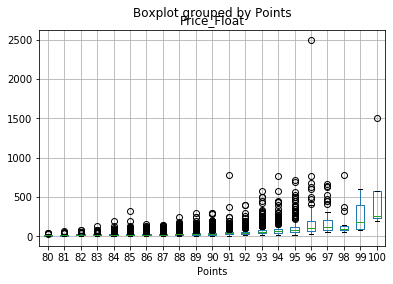

In [30]:
data_world_wines_df.boxplot('Price_Float',by="Points")

In [31]:
# Extract individual groups
group1 = df[df["treatment"] == 1]["mosq"]
group2 = df[df["treatment"] == 2]["mosq"]
group3 = df[df["treatment"] == 3]["mosq"]
group4 = df[df["treatment"] == 4]["mosq"]
group5 = df[df["treatment"] == 5]["mosq"]

NameError: name 'df' is not defined

In [32]:
stats.f_oneway(group1, group2, group3, group4, group5)

NameError: name 'stats' is not defined

In [33]:
data_world_wines_df_grouped_grape = data_world_wines_df.groupby(['Variety'])
data_world_wines_df_grouped_grape.count()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Winery,Price_Float,Price_Per_Points
Variety,,,,,,,,,,,
Agiorgitiko,8,8,0,3,8,8,8,8,8,8,8
Aglianico,72,72,72,49,72,58,72,72,72,58,58
Albana,9,9,8,8,9,8,9,9,9,8,8
Albari¤o,93,93,91,49,93,93,93,93,93,93,93
Aleatico,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Zierfandler-Rotgipfler,3,3,0,0,3,3,3,3,3,3,3
Zinfandel,517,517,516,385,517,516,517,517,517,516,516
Zlahtina,1,1,0,0,1,1,1,1,1,1,1


In [34]:
data_world_wines_df_grouped_grape.mean()['Price_Float'].nlargest(20)

Variety
Ramisco                      495.000000
Furmint                      149.000000
Champagne Blend              101.571429
Malbec Blend                  95.000000
Mazuelo                       92.000000
Vitovska                      85.000000
Pinot Noir-Syrah              80.000000
Shiraz-Cabernet               75.000000
Carignan                      69.105263
Syrah-Cabernet Franc          69.000000
Nebbiolo                      66.777283
Sangiovese Grosso             64.653846
Port                          64.333333
Malbec-Cabernet Sauvignon     62.307692
Moscatel                      60.666667
Shiraz-Viognier               60.375000
Babi?                        60.000000
Tinta Francisca               60.000000
Chardonnay-Pinot Blanc        59.000000
Tokaji                        58.833333
Name: Price_Float, dtype: float64

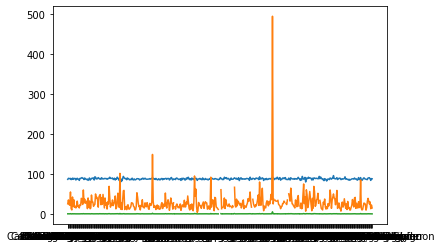

In [35]:
plt.plot(data_world_wines_df_grouped_grape.mean())

In [36]:
data_world_wines_df_grouped_country = data_world_wines_df.groupby(['Country'])
data_world_wines_df_grouped_country.count()

,Vintage,County,Designation,Points,Price,Province,Title,Variety,Winery,Price_Float,Price_Per_Points
Country,,,,,,,,,,,
Argentina,760,750,582,760,749,760,760,760,760,749,749
Australia,465,465,318,465,460,465,465,465,465,460,460
Austria,692,0,591,692,569,692,692,692,692,569,569
Brazil,9,0,9,9,7,9,9,9,9,7,7
Bulgaria,31,0,21,31,31,31,31,31,31,31,31
Canada,52,52,34,52,52,52,52,52,52,52,52
Chile,924,0,789,924,919,924,924,924,924,919,919
Croatia,15,0,9,15,15,15,15,15,15,15,15
Czech Republic,1,0,0,1,1,1,1,1,1,1,1


In [37]:
data_world_wines_df_grouped_country.count()['Price_Float'].nlargest(12)

Country
US              10538
France           3286
Italy            3228
Spain            1239
Portugal          973
Chile             919
Argentina         749
Austria           569
Australia         460
Germany           414
New Zealand       263
South Africa      252
Name: Price_Float, dtype: int64

In [61]:
top12_countries = data_world_wines_df_grouped_country.count()['Price_Float'].nlargest(12)

Text(0.5, 0, 'Country')

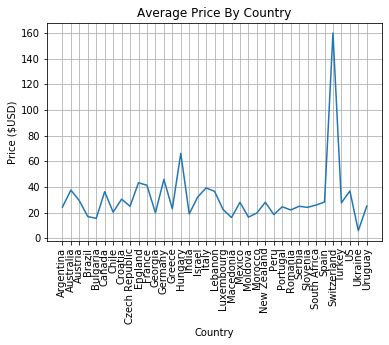

In [38]:
plt.plot(data_world_wines_df_grouped_country['Price_Float'].mean())
plt.xticks(rotation='vertical')
plt.grid(True)

plt.title('Average Price By Country')
plt.ylabel('Price ($USD)')
plt.xlabel('Country')

In [39]:
data_world_wines_df_grouped_points = data_world_wines_df.groupby(['Points'])
data_world_wines_df_grouped_points.mean()

,Price_Float,Price_Per_Points
Points,,
80,15.463768,0.193297
81,16.734848,0.206603
82,18.876623,0.230203
83,18.733333,0.225703
84,19.732980,0.234916
85,20.634684,0.242761
86,22.046721,0.256357
87,24.089380,0.276889
88,28.308500,0.321688


In [40]:
(555-14.46)/20

27.026999999999997

In [41]:
data_world_wines_df['Price_Float'].mean()/data_world_wines_df['Points'].mean()

0.40081929896656615

In [42]:
data_world_wines_df_grouped_points.count()

,Vintage,Country,County,Designation,Price,Province,Title,Variety,Winery,Price_Float,Price_Per_Points
Points,,,,,,,,,,,
80,69,69,57,38,69,69,69,69,69,69,69
81,133,133,108,85,132,133,133,133,133,132,132
82,317,317,262,188,308,317,317,317,317,308,308
83,588,588,486,348,570,588,588,588,588,570,570
84,1191,1191,979,706,1131,1191,1191,1191,1191,1131,1131
85,1798,1798,1463,1104,1678,1798,1798,1798,1798,1678,1678
86,2480,2477,2031,1567,2333,2477,2480,2480,2480,2333,2333
87,3247,3245,2716,2152,3032,3245,3247,3247,3247,3032,3032
88,3256,3255,2753,2197,3047,3255,3256,3256,3256,3047,3047


([<matplotlib.axis.XTick at 0x29d0ddf5608>,
 <a list of 21 Text xticklabel objects>)

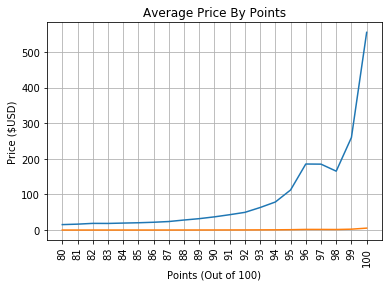

In [44]:
x_axis = np.arange(80,101,1)
plt.plot(data_world_wines_df_grouped_points.mean())
plt.xticks(rotation='vertical')
plt.grid(True)

plt.title('Average Price By Points')
plt.ylabel('Price ($USD)')
plt.xlabel('Points (Out of 100)')
plt.xticks(x_axis)

In [45]:
plt.bar(data_world_wines_df_grouped_points.count()['Vintage'])

TypeError: bar() missing 1 required positional argument: 'height'

In [57]:
# Set line
(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, data_world_wines_df_grouped_points.mean()['Price_Float'])
fit = slope * x_axis + intercept

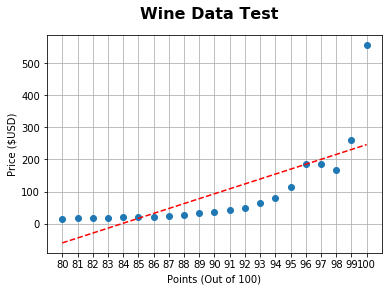

In [55]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Wine Data Test", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

ax.set_xlabel('Points (Out of 100)')
ax.set_ylabel('Price ($USD)')
plt.xticks(x_axis)
plt.grid(True)

ax.plot(x_axis, data_world_wines_df_grouped_points.mean()['Price_Float'], linewidth=0, marker='o')
#'b--' blue line with dashes
ax.plot(x_axis, fit, 'r--')

plt.show()

# Loop through the countries for each 

In [56]:
slope

15.293594971140783

In [60]:
r_value *r_value

0.5564581510285337